# Introduction

In this tutorial, we will learn about GridSearchCV function in Scikit-Learn. GridSearchCV is a function that is used to search for the best hyperparameters for a given model. It is an exhaustive search over specified parameter values for an estimator. The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

# Import libraries

Let's begin by importing the necessary libraries.

In [2]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_hastie_10_2
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Load dataset

In this step, we will load a dataset using Scikit-Learn's make_hastie_10_2 function. This function generates a synthetic dataset for binary classification.

In [3]:
X, y = make_hastie_10_2(n_samples=8000, random_state=42)

# Define the hyperparameters and evaluation metrics

In this step, we will define the hyperparameters for the DecisionTreeClassifier model and the evaluation metrics that we will be using. We will be using the AUC (Area Under the Curve) and Accuracy metrics.

In [4]:
scoring = {'AUC':'roc_auc', 'Accuracy':make_scorer(accuracy_score)}

# Perform the grid search

In this step, we will use the GridSearchCV function to perform the grid search. We will be searching for the best hyperparameters for the min_samples_split parameter of the DecisionTreeClassifier model.

In [6]:
gs = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid={"min_samples_split": range(2, 403, 20)},
    scoring=scoring,
    refit="AUC",
    n_jobs=2,
    return_train_score=True,
)
gs.fit(X, y)
results = gs.cv_results_

# Visualize the results

In this step, we will visualize the results of the grid search using a plot. We will be plotting the AUC and Accuracy scores for both the training and testing sets.

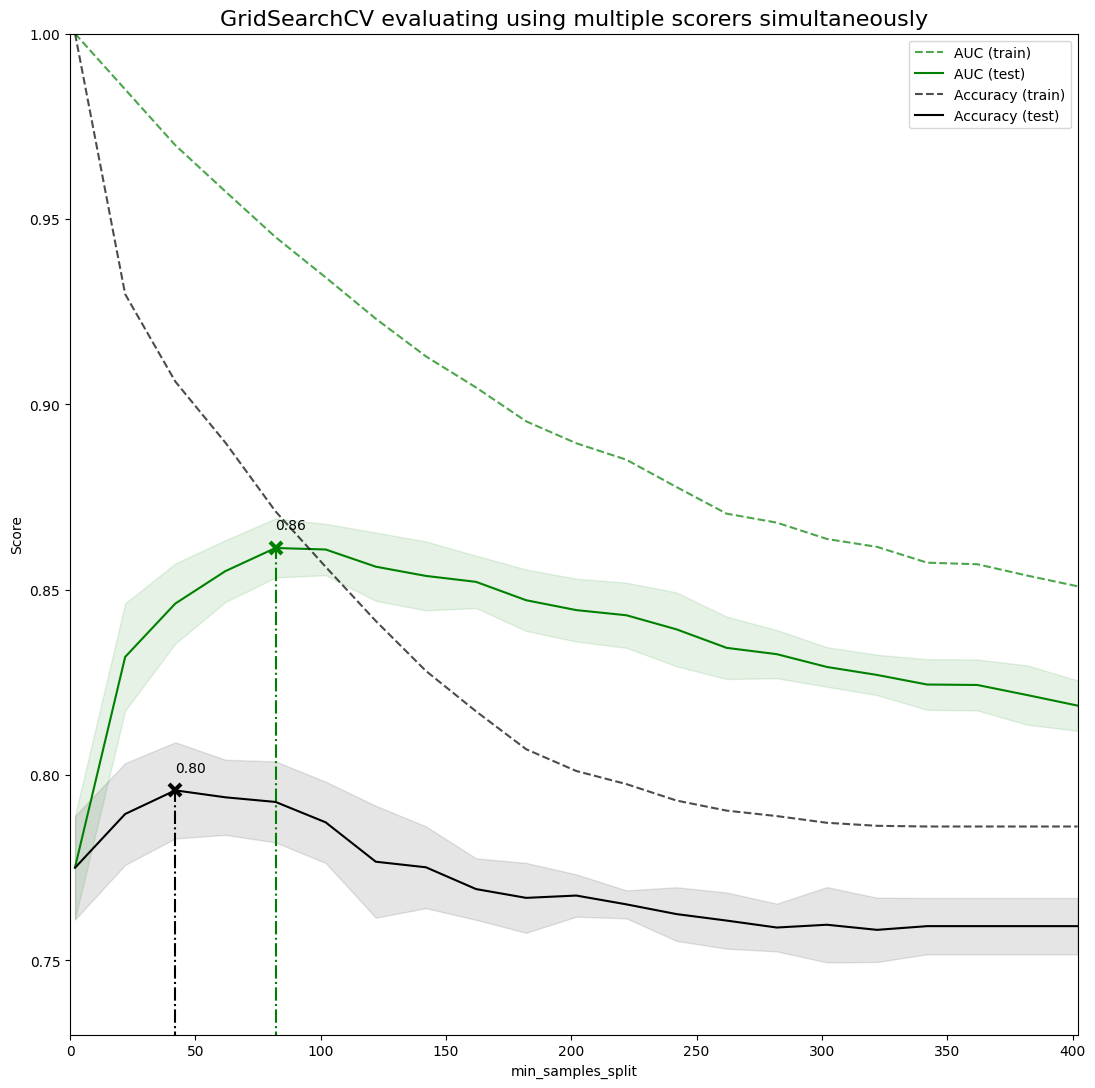

In [7]:
plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously", fontsize=16)

plt.xlabel("min_samples_split")
plt.ylabel("Score")

ax = plt.gca()
ax.set_xlim(0, 402)
ax.set_ylim(0.73, 1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results["param_min_samples_split"].data, dtype=float)

for scorer, color in zip(sorted(scoring), ["g", "k"]):
    for sample, style in (("train", "--"), ("test", "-")):
        sample_score_mean = results["mean_%s_%s" % (sample, scorer)]
        sample_score_std = results["std_%s_%s" % (sample, scorer)]
        ax.fill_between(
            X_axis,
            sample_score_mean - sample_score_std,
            sample_score_mean + sample_score_std,
            alpha=0.1 if sample == "test" else 0,
            color=color,
        )
        ax.plot(
            X_axis,
            sample_score_mean,
            style,
            color=color,
            alpha=1 if sample == "test" else 0.7,
            label="%s (%s)" % (scorer, sample),
        )

    best_index = np.nonzero(results["rank_test_%s" % scorer] == 1)[0][0]
    best_score = results["mean_test_%s" % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot(
        [
            X_axis[best_index],
        ]
        * 2,
        [0, best_score],
        linestyle="-.",
        color=color,
        marker="x",
        markeredgewidth=3,
        ms=8,
    )

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score, (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid(False)
plt.show()


# Summary

In this tutorial, we learned about GridSearchCV function in Scikit-Learn. We saw how to load a dataset, define hyperparameters and evaluation metrics, perform the grid search, and visualize the results using a plot. GridSearchCV is an important function to use when searching for the best hyperparameters for a given model.